In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#data['Winning']=data['W'].replace(('W'),('Winning'))

In [4]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
data.shape

(30, 17)

W
R
AB
H
2B
3B
HR
BB
SO
SB
RA
ER
ERA
CG
SHO
SV
E


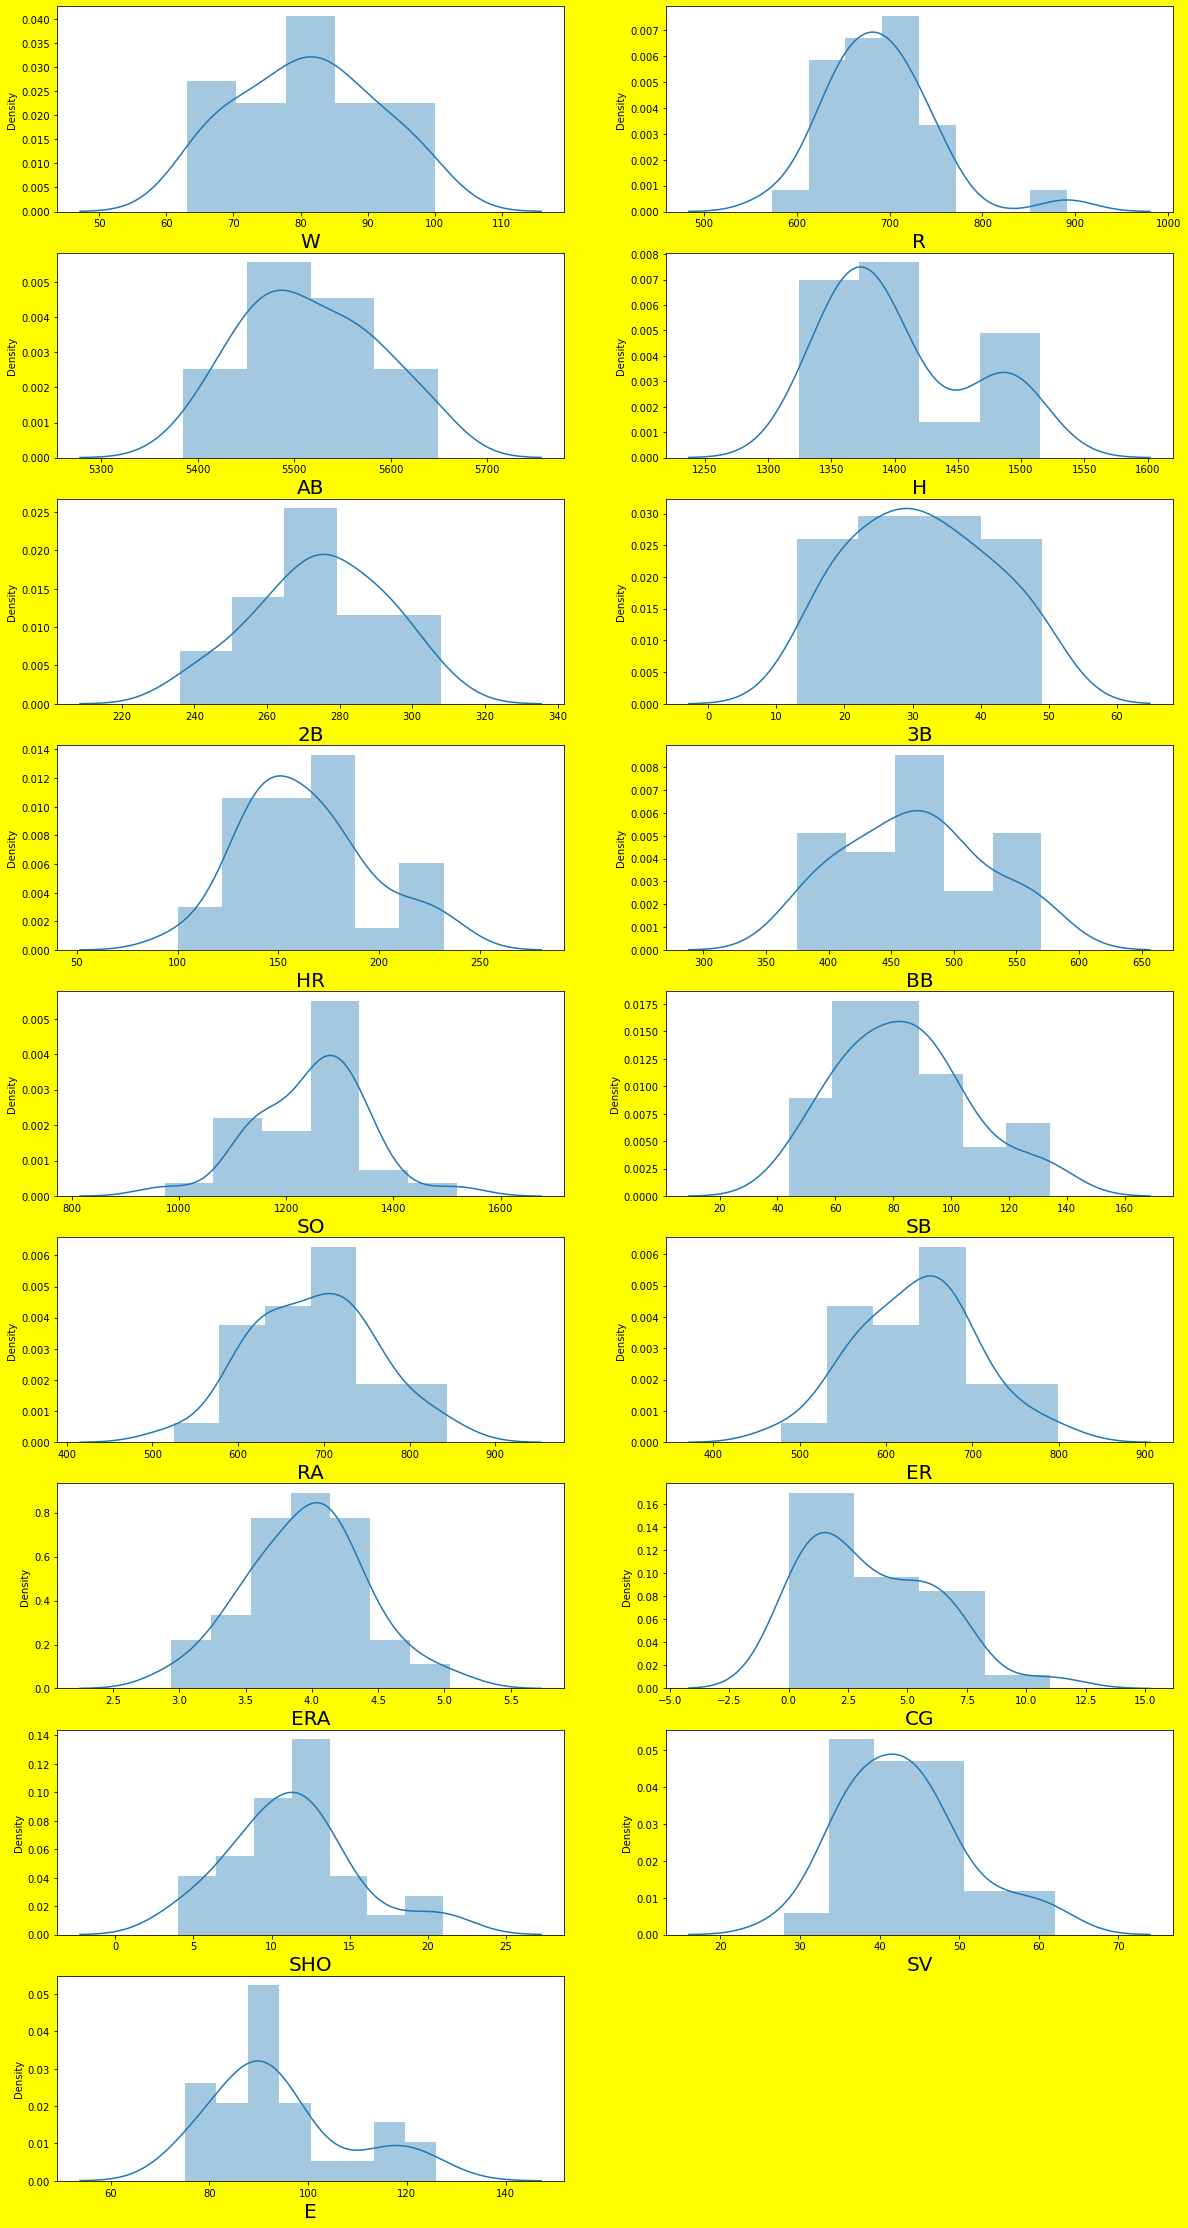

In [6]:
plt.figure(figsize=(20,40), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=17:
        ax=plt.subplot(9,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        print(column)
    plotnumber+=1
plt.show()

In [7]:
data_features=data.drop('W',axis=1)

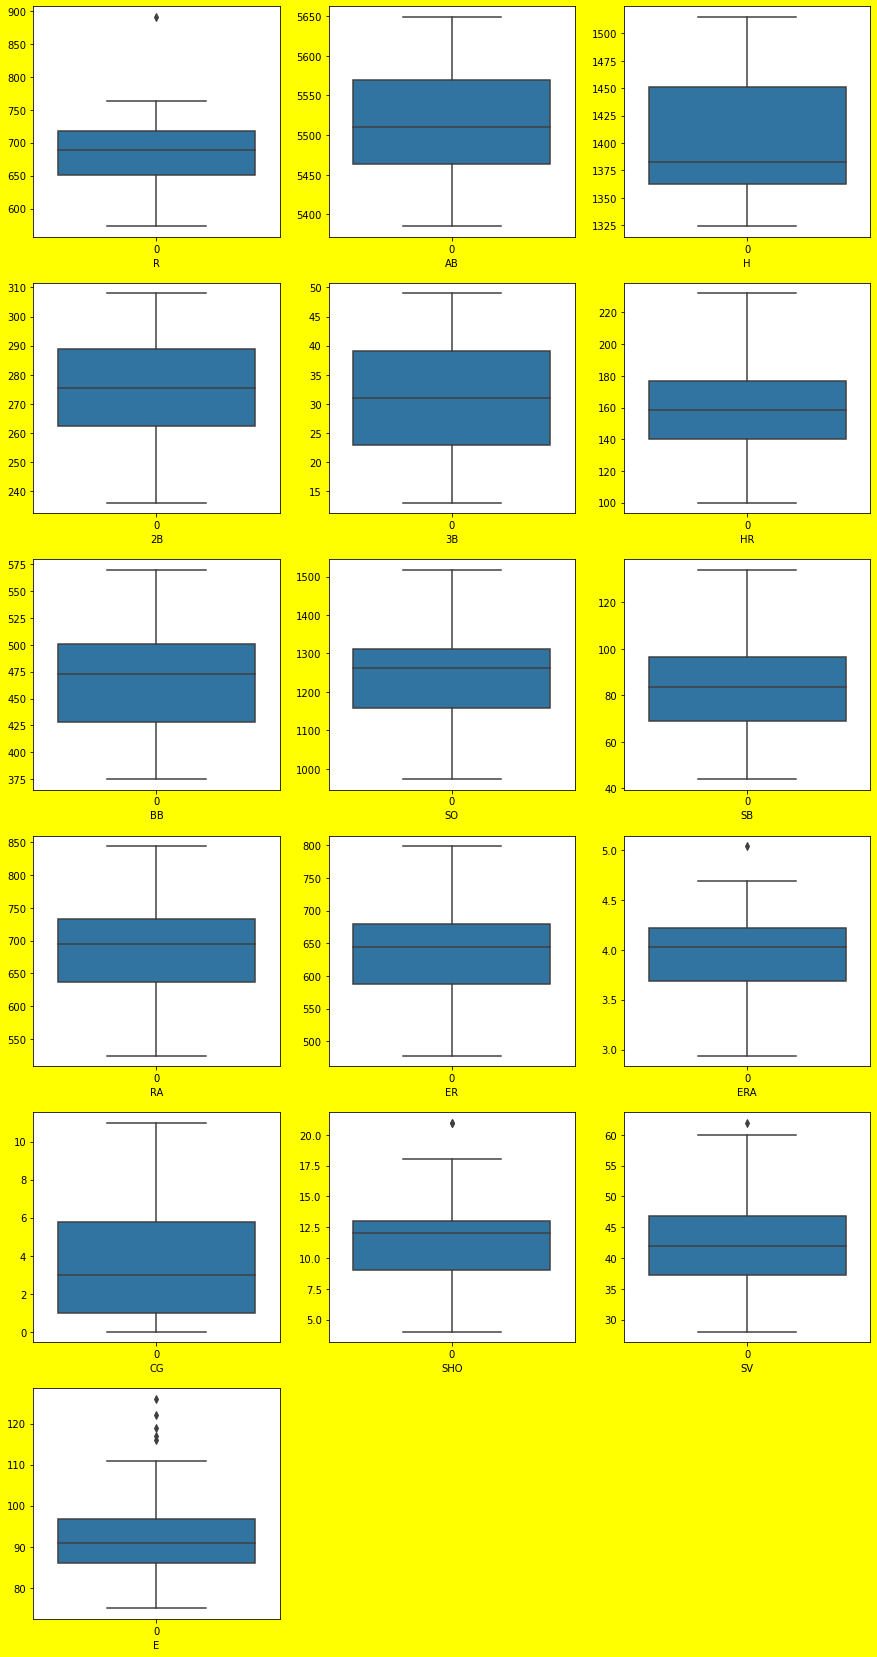

In [8]:
#check the outliers
plt.figure(figsize=(15,50), facecolor='yellow')
graph=1

for column in data_features:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        #sns.boxplot(df_features[column],orient='v')
        ax=sns.boxplot(data=data_features[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [9]:
q1=data.quantile(0.25)

#3rd Quantile
q3=data.quantile(0.75)

iqr=q3-q1

In [10]:
r=q3.R+(1.5*iqr.R)
r

818.75

In [11]:
era=q3.ERA+(1.5*iqr.ERA)
era

5.026250000000001

In [12]:
sho=q3.SHO+(1.5*iqr.SHO)
sho

19.0

In [13]:
sv=q3.SV+(1.5*iqr.SV)
sv

61.0

In [14]:
e=q3.E+(1.5*iqr.E)
e

112.875

In [15]:
index=np.where(data['R']> r)

data=data.drop(data.index[index])

print(data.shape)

(29, 17)


In [16]:
index

(array([5], dtype=int64),)

In [17]:
index=np.where(data['ERA']> era)

data=data.drop(data.index[index])

print(data.shape)

(28, 17)


In [18]:
index=np.where(data['SHO']> sho)

data=data.drop(data.index[index])

print(data.shape)

(26, 17)


In [19]:
index=np.where(data['SV']> sv)

data=data.drop(data.index[index])

print(data.shape)

(25, 17)


In [20]:
index=np.where(data['E']> e)

data=data.drop(data.index[index])

print(data.shape)

(20, 17)


In [21]:
data.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


W
R
AB
H
2B
3B
HR
BB
SO
SB
RA
ER
ERA
CG
SHO
SV
E


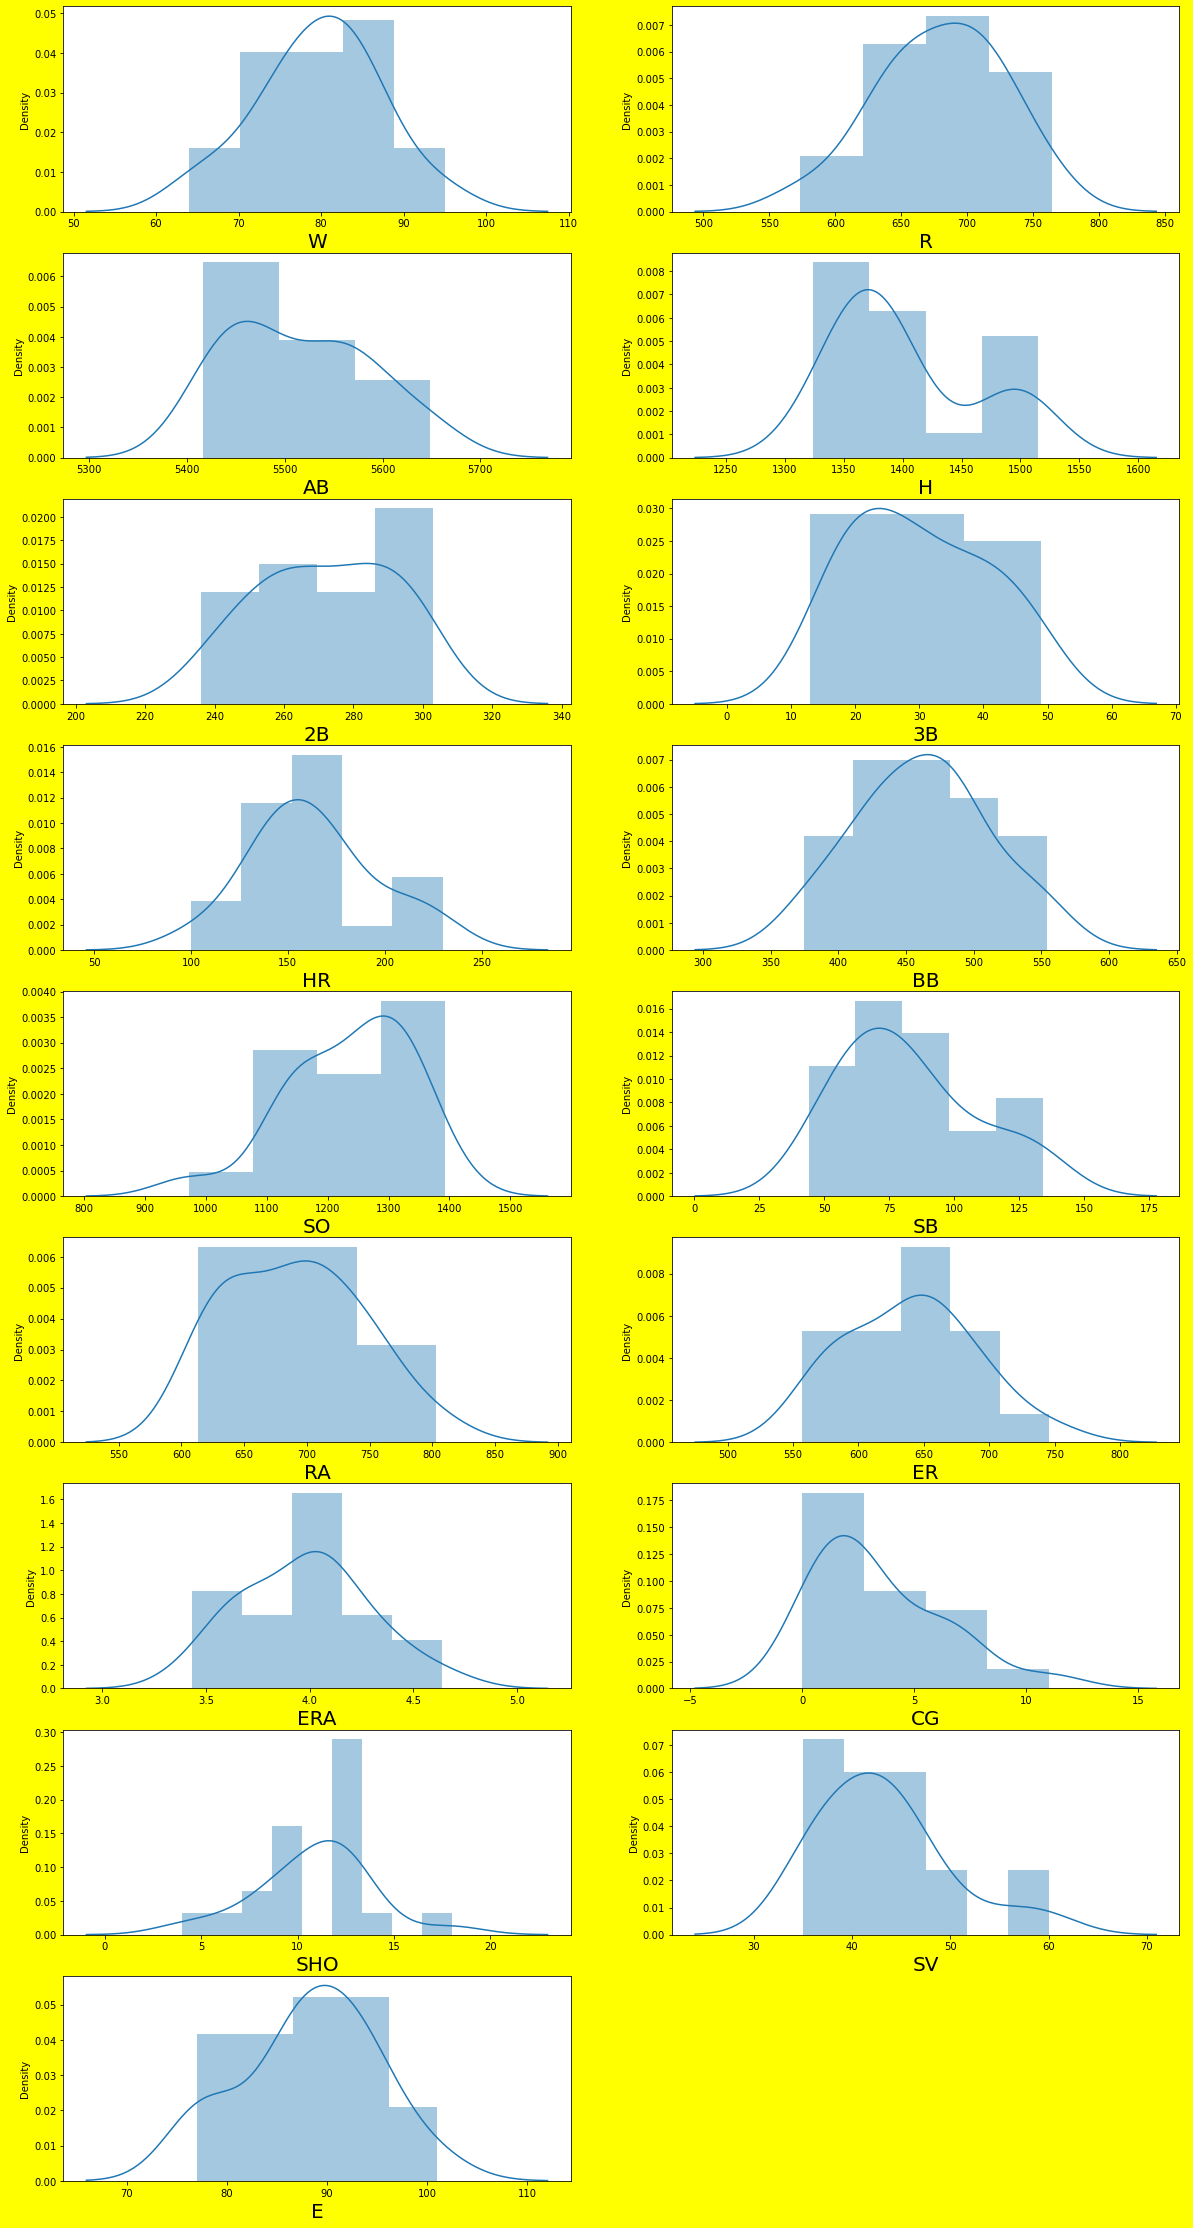

In [22]:
plt.figure(figsize=(20,40), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=17:
        ax=plt.subplot(9,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        print(column)
    plotnumber+=1
plt.show()

In [23]:
X=data.drop(columns=['W'])
y=data['W']

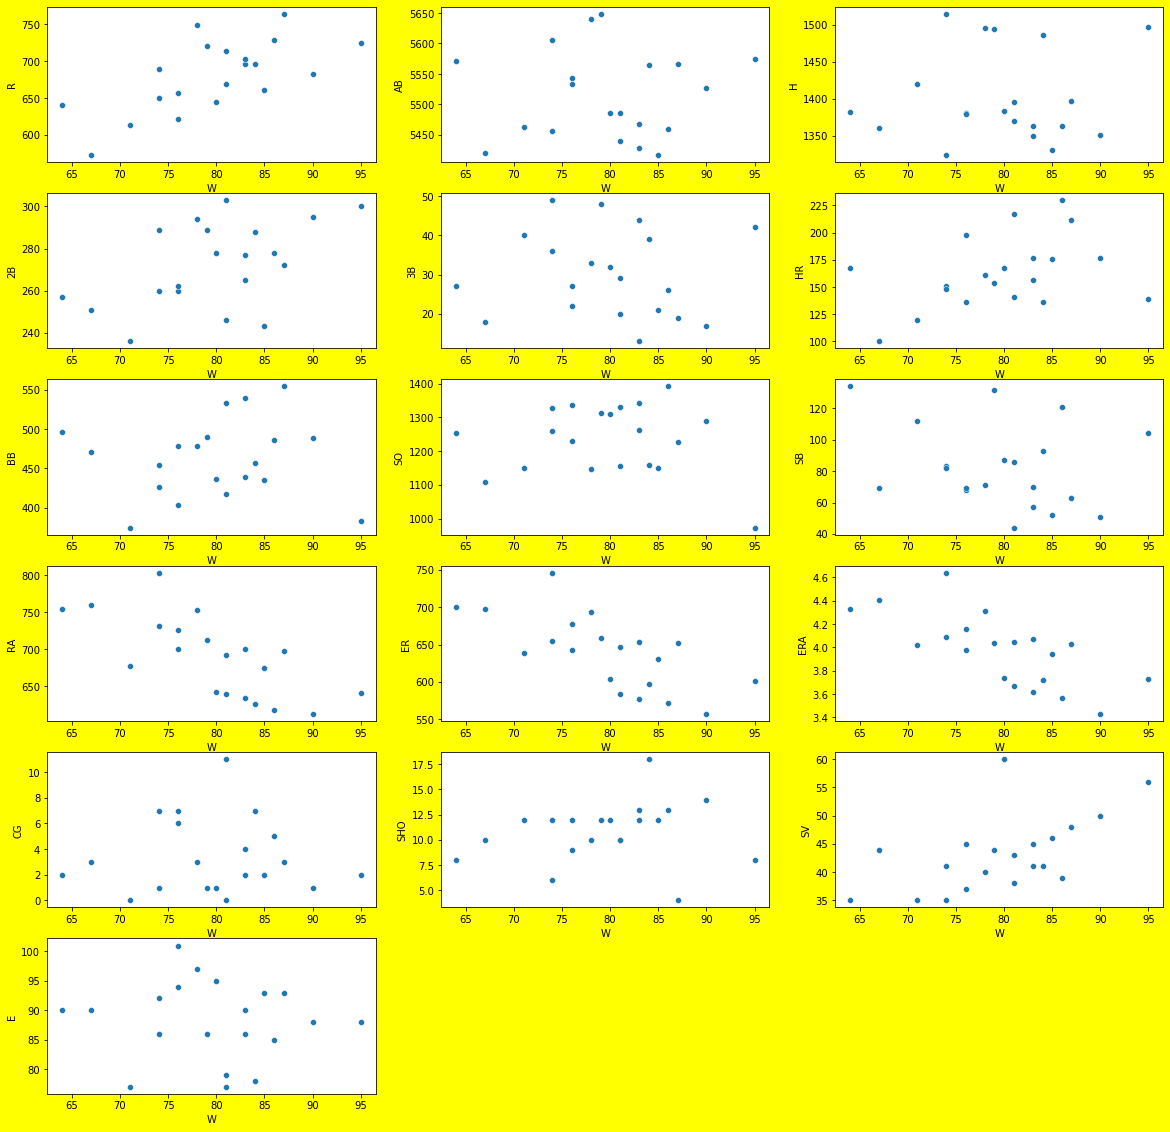

In [24]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.scatterplot(y,X[column])#strip Plot
    plotnumber+=1
plt.show()

In [25]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [26]:
X_scaled.shape[1]

16

In [27]:
X_scaled

array([[ 0.94564673,  0.85045895,  1.60490118,  1.42824738,  1.1200031 ,
        -0.75500922, -1.65492227, -2.63251545,  0.83576663, -0.93352439,
        -0.7886327 , -0.82441053, -0.49374193, -0.97029183,  1.98214924,
        -0.0382192 ],
       [ 0.34862061, -0.67528136, -0.89011326,  0.24872531,  1.30823892,
        -0.22353275, -0.48255482,  0.2791607 , -0.47979195,  0.18936937,
         0.28630571,  0.30811303, -0.49374193,  0.39152127,  0.28536779,
        -0.34397277],
       [-0.22708315, -1.07084367, -0.1146358 ,  1.58209809, -0.1035297 ,
        -0.69248258,  1.48534769, -0.79145561,  0.13929444, -0.95255648,
        -1.14005488, -1.02426763,  2.68031334, -0.28938528, -0.79440222,
        -1.41411027],
       [-1.22923414,  0.2571155 , -0.35065068, -0.62309536, -0.29176551,
        -0.84879919, -1.21528447, -0.05102938, -0.55717775,  0.20840147,
         0.07958679,  0.00832738,  1.26962211, -0.62983856, -0.94865508,
         1.94917902],
       [ 0.19936408,  1.27427571,  1

In [28]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns

vif

,vif,features
0,39.708041,R
1,141.142572,AB
2,32.875135,H
3,32.689242,2B
4,59.652461,3B
5,51.352184,HR
6,17.624292,BB
7,14.135117,SO
8,6.202011,SB
9,385.454748,RA


### Trial 1 with 25% test data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [30]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [44]:
data.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92


In [48]:
print('Winning score',linear_reg.predict(scalar.transform([[720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86]])))

Winning score [75.06562145]


In [49]:
print('Winning score',linear_reg.predict(scalar.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))

Winning score [74.]


In [31]:
y_pred=linear_reg.predict(x_test)

In [32]:
y_pred

array([66.81513818, 76.61435594, 90.1184444 , 75.06562145, 84.93831036])

In [33]:
linear_reg.score(x_test,y_test)

-0.7622721497722973

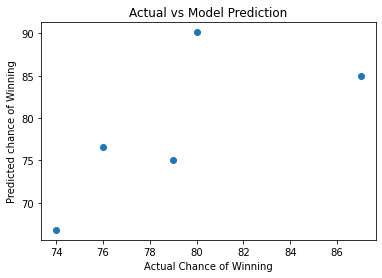

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Winning')
plt.ylabel('Predicted chance of Winning')
plt.title('Actual vs Model Prediction')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
y_pred=linear_reg.predict(x_test)

In [37]:
a=mean_absolute_error(y_test,y_pred)
b=mean_squared_error(y_test,y_pred)
c=np.sqrt(mean_squared_error(y_test,y_pred))
print('mean_absolute_error = ',a)
print('mean_squared_error = ',b)
print('sqrt(mean_squared_error) = ',c)

mean_absolute_error =  4.782746069932571
mean_squared_error =  34.82249767950059
sqrt(mean_squared_error) =  5.901059030335198


In [38]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [39]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize= True)#max_iter = how much time it will learn
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [40]:
alpha=lasscv.alpha_
alpha

0.0016284416688187658

In [41]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0016284416688187658)

In [42]:
lasso_reg.score(x_test,y_test)

-0.7059748508611645

### Trial 2 for 5% test data

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.05,random_state=355)

In [51]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [53]:
data.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92


In [52]:
print('Winning score',linear_reg.predict(scalar.transform([[720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86]])))
print('Winning score',linear_reg.predict(scalar.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))

Winning score [78.1257765]
Winning score [74.74745198]


In [54]:
y_pred=linear_reg.predict(x_test)
y_pred 

array([64.0546024])

In [59]:
linear_reg.score(x_test,y_test)

nan

In [58]:
y_test

4    74
Name: W, dtype: int64

### Trial 3 with 10% test data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.10,random_state=355)
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
data.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92


In [63]:
y_pred=linear_reg.predict(x_test)
y_pred 

array([64.31415183, 76.37163467])

In [64]:
linear_reg.score(x_test,y_test)

-45.97688354732092

In [65]:
print('Winning score',linear_reg.predict(scalar.transform([[720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86]])))
print('Winning score',linear_reg.predict(scalar.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))

Winning score [78.19384387]
Winning score [74.69547159]


### Dropping some columns

In [82]:
new_X=data.drop(['H','W','3B','SO'],axis=1)
new_y=data['W']

In [84]:
scalar=StandardScaler()
new_X_scaled=scalar.fit_transform(new_X)

In [83]:
new_X.shape

(20, 13)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(new_X_scaled,new_y,test_size=0.10,random_state=355)
linear_reg1=LinearRegression()
linear_reg1.fit(x_train,y_train)
data.tail(2)
new_X

,R,AB,2B,HR,BB,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,300,139,383,104,641,601,3.73,2,8,56,88
1,696,5467,277,156,439,70,700,653,4.07,2,12,45,86
2,669,5439,303,141,533,86,640,584,3.67,11,10,38,79
3,622,5533,260,136,404,68,701,643,3.98,7,9,37,101
4,689,5605,289,151,455,83,803,746,4.64,7,12,35,86
6,764,5567,272,212,554,63,698,652,4.03,3,4,48,93
7,713,5485,246,217,418,44,693,646,4.05,0,10,43,77
8,644,5485,278,167,436,87,642,604,3.74,1,12,60,95
9,748,5640,294,161,478,71,753,694,4.31,3,10,40,97
11,729,5459,278,230,486,121,618,572,3.57,5,13,39,85


In [99]:
new_y

0     95
1     83
2     81
3     76
4     74
6     87
7     81
8     80
9     78
11    86
12    85
13    76
19    64
20    90
21    83
22    71
23    67
26    84
27    79
28    74
Name: W, dtype: int64

In [106]:
y_pred=linear_reg1.predict(x_test)
y_pred 

array([68.70410907, 74.96675476])

In [107]:
print('Winning score = ',linear_reg1.predict(scalar.transform([[650,5457,260,148,426,82,731,655,4.09,1,6,41,92]])))
#print('Winning score',linear_reg1.predict(scalar.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))

Winning score =  [75.66014287]
